In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
import os
print(os.listdir("../vanessatorres/desktop/kickstarter-projects"))

['.DS_Store', '.ipynb_checkpoints', '.Rapp.history', 'ks-projects-201612.csv', 'ks-projects-201801.csv']


In [3]:
df_ks18 = pd.read_csv("../vanessatorres/desktop/kickstarter-projects/ks-projects-201801.csv", encoding='ISO-8859-14')
df_ks18.describe()
df_ks18.head(n=3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


In [4]:
df_ks18.drop(['usd_pledged_real', 'usd_goal_real'], axis=1, inplace=True)

In [5]:
cols = df_ks18.columns.tolist()
for entry in np.arange(0,len(cols),1):
    cols[entry] = cols[entry].rstrip()
df_ks18.columns = cols
df_ks18.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged'],
      dtype='object')

In [6]:
df_ks18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 13 columns):
ID               378661 non-null int64
name             378657 non-null object
category         378661 non-null object
main_category    378661 non-null object
currency         378661 non-null object
deadline         378661 non-null object
goal             378661 non-null float64
launched         378661 non-null object
pledged          378661 non-null float64
state            378661 non-null object
backers          378661 non-null int64
country          378661 non-null object
usd pledged      374864 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 37.6+ MB


In [8]:
df_ks18['backers'] = df_ks18['backers'].apply(pd.to_numeric, errors='coerce')
df_ks18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 13 columns):
ID               378661 non-null int64
name             378657 non-null object
category         378661 non-null object
main_category    378661 non-null object
currency         378661 non-null object
deadline         378661 non-null object
goal             378661 non-null float64
launched         378661 non-null object
pledged          378661 non-null float64
state            378661 non-null object
backers          378661 non-null int64
country          378661 non-null object
usd pledged      374864 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 37.6+ MB


In [9]:
df_ks18['state'].value_counts() < 100
acc_states = ['failed', 'successful', 'live', 'undefined', 'suspended']

In [10]:
acc_df_ks18 =df_ks18[df_ks18['state'].isin(acc_states)]

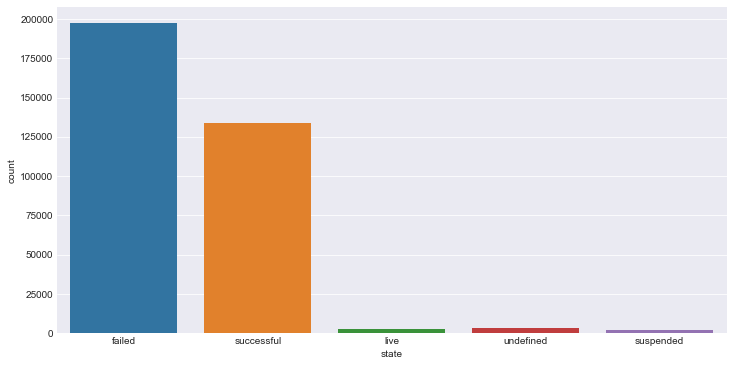

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='state', data=acc_df_ks18)

<function matplotlib.pyplot.tight_layout>

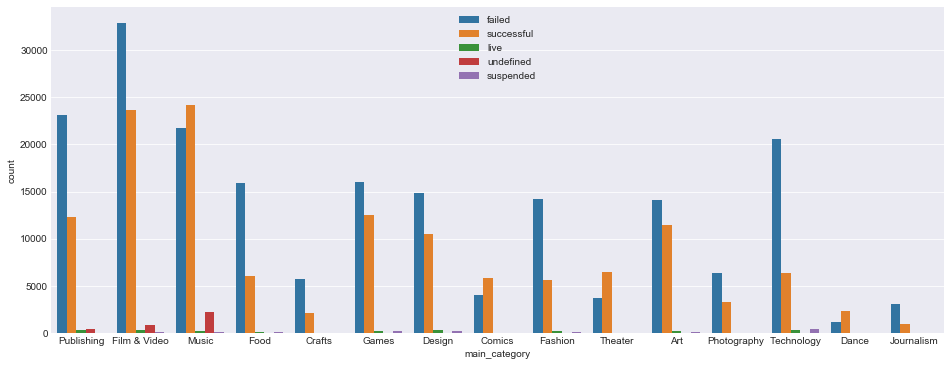

In [12]:
plt.figure(figsize=(16,6))
sns.countplot(x='main_category', data=acc_df_ks18, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

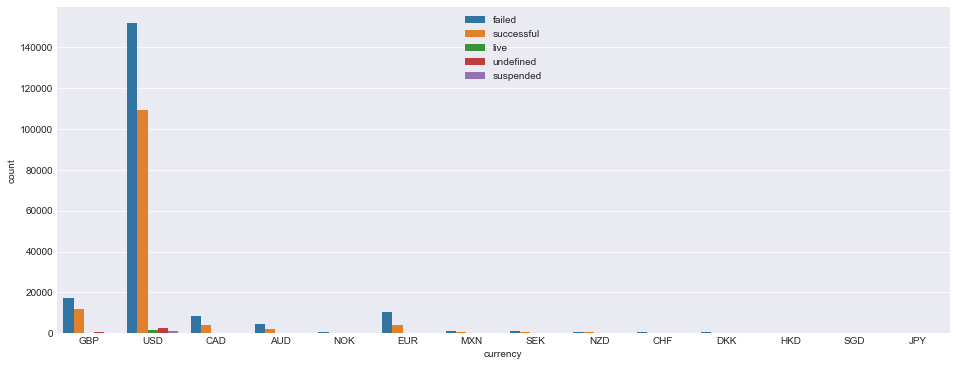

In [13]:
plt.figure(figsize=(16,6))
sns.countplot(x='currency', data=acc_df_ks18, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

In [14]:
df_successfail = acc_df_ks18[(acc_df_ks18['state'] == 'failed') |(acc_df_ks18['state'] == 'successful')]

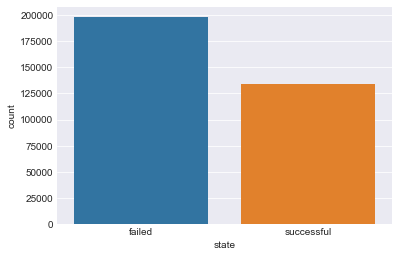

In [15]:
sns.countplot(x='state', data=df_successfail)

In [16]:
df_successfail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 0 to 378660
Data columns (total 13 columns):
ID               331675 non-null int64
name             331672 non-null object
category         331675 non-null object
main_category    331675 non-null object
currency         331675 non-null object
deadline         331675 non-null object
goal             331675 non-null float64
launched         331675 non-null object
pledged          331675 non-null float64
state            331675 non-null object
backers          331675 non-null int64
country          331675 non-null object
usd pledged      331465 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 45.4+ MB


In [17]:
df_successfail[['deadline', 'launched']] = df_successfail[['deadline', 'launched']].apply(pd.to_datetime, errors='coerce', infer_datetime_format=True)

/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [18]:
import datetime
df_successfail['length'] = df_successfail['deadline'] - df_successfail['launched']

/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
def daysfinder(timedelta):
    numdays = timedelta.days
    return numdays

In [20]:
df_successfail['length'] = df_successfail['length'].apply(lambda x: daysfinder(x))

/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_successfail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 0 to 378660
Data columns (total 14 columns):
ID               331675 non-null int64
name             331672 non-null object
category         331675 non-null object
main_category    331675 non-null object
currency         331675 non-null object
deadline         331675 non-null datetime64[ns]
goal             331675 non-null float64
launched         331675 non-null datetime64[ns]
pledged          331675 non-null float64
state            331675 non-null object
backers          331675 non-null int64
country          331675 non-null object
usd pledged      331465 non-null float64
length           331675 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(3), object(6)
memory usage: 48.0+ MB


In [22]:
df_successfail = df_successfail[df_successfail['goal'] < 5000000]

<function matplotlib.pyplot.tight_layout>

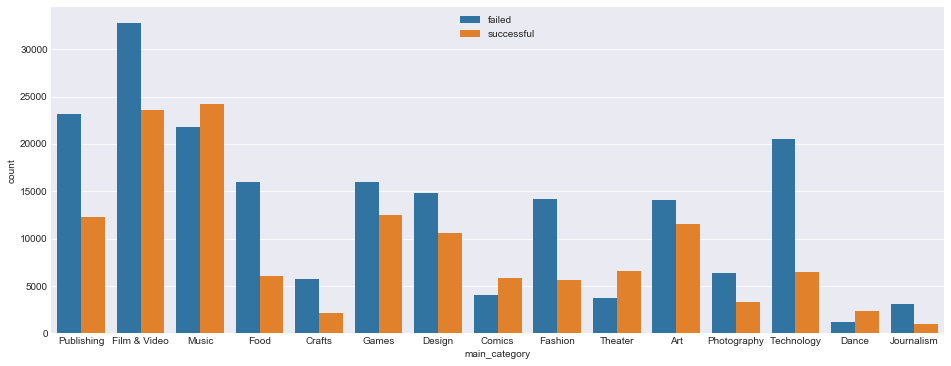

In [23]:
plt.figure(figsize=(16,6))
sns.countplot(x='main_category', data=df_successfail, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

In [24]:
df_dummies18 = pd.get_dummies(data=df_successfail['state'], drop_first=True)

In [25]:
df_successfail['state'] = df_dummies18

In [26]:
df_successfail['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Crafts', 'Games',
       'Design', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [27]:
category_dict = {
    'Publishing' :1,
    'Film & Video' :2,
    'Music' :3,
    'Food' :4,
    'Crafts' :5,
    'Games' :6,
    'Design' :7,
    'Comics' :8,
    'Fashion' :9,
    'Theater' :10,
    'Art' :11,
    'Photography' :12,
    'Technology' :13,
    'Dance' :14,
    'Journalism' :15
}
df_successfail['main_category'] = df_successfail['main_category'].replace(category_dict)

In [28]:
features = ['main_category', 'goal', 'backers', 'length']
target = ['state']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df_successfail[features]
y = df_successfail[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()

In [32]:
regressor.fit(X_train, y_train)

/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
predictions = regressor.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.87      0.95      0.91     49293
          1       0.92      0.80      0.85     33555

avg / total       0.89      0.89      0.89     82848



In [36]:
print(confusion_matrix(y_test, predictions))

[[46904  2389]
 [ 6769 26786]]
